In [71]:
# encoding: utf-8
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv('data/Influence_clean.csv', header=0,encoding= 'utf-8',  delimiter='|')
data['minreleasedate'] = pd.to_datetime(pd.Series(data.minreleasedate))
data['times_covered'].fillna(0, inplace=True)
data['artistid'] = data.artist.map({'The Beatles':0, 'The Rolling Stones':1})

In [26]:
data['artist'] = data.artist.astype('category')
data['songname'] = data.songname.astype('category')


In [74]:
#feature_cols = [ 'minreleasedate','num_releases', 'countries', 'avg_rating','title_sent', 'lyric_sent','is_cover']
feature_cols = [ 'artistid','num_releases','lyric_sent','title_sent', 'countries', 'avg_rating','is_cover']
X= data[data.is_cover == 0][feature_cols]
y = data[data.is_cover == 0].times_covered


In [82]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
rfreg = RandomForestClassifier(n_estimators=300, max_features='auto', oob_score=True, random_state=1)
rfreg.fit(X, y)
rfreg.oob_score_

0.1449814126394052

In [77]:
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
Acc_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=500, max_features=feature, random_state=1)
    acc_val_scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    Acc_scores.append(acc_val_scores)

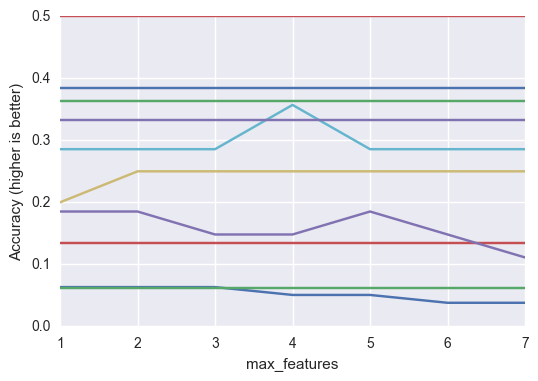

In [80]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, Acc_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy (higher is better)')

In [81]:
rfreg.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'